In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [63]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')

In [3]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


- 1 = Basic Service
- 2 = E-Service
- 3 = Plus Service
- 4 = Total Service

In [53]:
df["custcat"].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [26]:
df["income"].isna().sum()

0

In [27]:
df["age"].isna().sum()

0

 age and income vs custcat

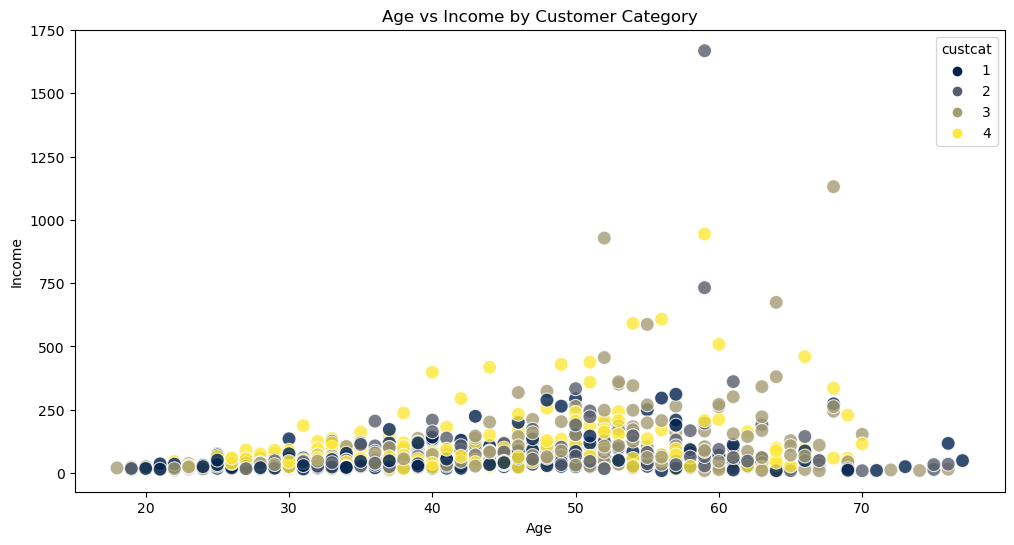

In [22]:
# s determine siz of point
# alpha  transparency
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='income', hue='custcat', data=df, palette='cividis', s=100, alpha=0.8)
plt.title('Age vs Income by Customer Category')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

1. Pick a value for K
2. Calculate the distance of unknown case from all cases (dissimilarity)
3. Select the K-observations in the training data that are nearest to the unknown data point.
4. Predict the results of the unknown data point, using the most popular response value from the K-nearest neighbors.

For unknown case, first pick K=1 
Calculate and make prediction until K=20
Compare results

- Normalize the data : StandardScaler
- Classification : KNeighborsClassifier
- Training : k=4
- evaluation : accuracy_score()

In [104]:
train,test =train_test_split(df, test_size=0.2)

In [108]:
train_x = np.asanyarray(train[["income","age"]])
train_y = np.asanyarray(train[["custcat"]])

test_x = np.asanyarray(test[["income","age"]])
test_y = np.asanyarray(test[["custcat"]])

scaler = StandardScaler()
train_x_ss= scaler.fit_transform(train_x)

# creating the model
knn = KNeighborsClassifier(n_neighbors=4)

train_y_ = knn.fit(train_x_ss,train_y)

c:\Users\Excalibur\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [111]:
test_x_trans = scaler.transform(test_x)
y_pred =knn.predict(test_x_trans)

In [112]:
accurracy = accuracy_score(test_y, y_pred)
print(f"Test Set Accuracy = {accurracy}")

Test Set Accuracy = 0.25
